In [3]:
import pandas as pd
import numpy as np

In [4]:
dfs = []
paths = ['PISA Scores Compressed.csv', 'World Wide Graduation Rates.csv', 'World Wide Salary Data.csv']
for i in range(len(paths)):
    dfs.append(pd.read_csv(paths[i]))

In [5]:
#Codes
codes = [
    set(dfs[0]['Code'].unique().tolist()),
    set(dfs[1]['LOCATION'].unique().tolist()),
    set(dfs[2]['COUNTRY'].unique().tolist())
]
all_countries = list(codes[0].intersection(codes[1].intersection(codes[2])))

np.array(all_countries)
# some might not work or have missing data (ex. can for salary)

array(['AUS', 'HUN', 'SVK', 'GRC', 'SWE', 'KOR', 'DEU', 'NLD', 'CRI',
       'IDN', 'ZAF', 'NZL', 'SAU', 'SVN', 'JPN', 'TUR', 'CHL', 'ISR',
       'COL', 'LTU', 'AUT', 'USA', 'RUS', 'EST', 'CHE', 'DNK', 'BRA',
       'FIN', 'IRL', 'LUX', 'LVA', 'ITA', 'MEX', 'FRA', 'CAN', 'POL',
       'NOR', 'ESP', 'ISL', 'PRT', 'CZE'], dtype='<U3')

In [6]:
needed_countries = ['USA', 'FIN', 'AUT', 'NOR', 'IRL']

In [7]:
tpllist = set([(dfs[2].iloc[i,0], dfs[2].iloc[i,1]) for i in range(len(dfs[2].index.values)) if dfs[2].iloc[i,0] in needed_countries])
code2name = {tpl[0]:tpl[1] for tpl in tpllist}
name2code = {tpl[1]:tpl[0] for tpl in tpllist}
code2name.keys()

dict_keys(['NOR', 'USA', 'AUT', 'IRL', 'FIN'])

In [8]:
cdfs = [x for x in dfs]

In [9]:
# dfs[2].drop(dfs[2]['COUNTRY']!='CAN')
# dfs[2][pd.Series(dfs[2]['COUNTRY']=='CAN')]
# dfs[2]
# dfs[2]['COUNTRY'].iloc[:, dfs[2]['COUNTRY']=='CAN']

In [10]:
countries_0 = [dfs[0].iloc[i,1] in code2name.keys() for i in range(len(dfs[0].index.values))]
cdfs[0] = dfs[0].iloc[countries_0].copy()

In [11]:
cdfs[0].drop(['Entity', 'Continent'], axis=1, inplace=True)

In [12]:
cdfs[0].dropna(axis = 0, thresh = (~cdfs[0].iloc[0].isna()).sum() + 1, inplace = True)

In [13]:
cdfs[0].set_index('Year', inplace=True)

In [14]:
names0 = ['Country', 'Population', '10th percentile', '90th percentile']
cdfs[0].rename(columns = {str(col):names0[i] for i,col in enumerate(cdfs[0].columns)}, inplace=True)

In [15]:
cdfs[0].head()

,Country,Population,10th percentile,90th percentile
Year,,,,
2000,AUT,8069000.0,359.050000,613.597998
2003,AUT,8176000.0,353.607880,617.389800
2006,AUT,8285000.0,347.784545,621.253607
2009,AUT,8373000.0,334.194492,596.178491
2012,AUT,8502000.0,365.096160,603.411200


In [16]:
countries_1 = [dfs[1].iloc[i,0] in code2name.keys() for i in range(len(dfs[1].index.values))]
cdfs[1] = dfs[1].iloc[countries_1].copy()

In [17]:
cdfs[1].drop(['INDICATOR', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis=1, inplace=True)

In [18]:
names1 = ['Country', 'Subject', 'Year', 'Graduation Rate']
cdfs[1].rename(columns = {str(col):names1[i] for i,col in enumerate(cdfs[1].columns)}, inplace=True)

In [19]:
cdfs[1].set_index('Year', inplace=True)

In [20]:
cdfs[1].replace({'UPPSRY':'All', 'UPPSRY_MEN':'Men', 'UPPSRY_WOMEN':'Women'}, inplace=True)

In [21]:
countries_2 = [dfs[2].iloc[i,0] in code2name.keys() for i in range(len(dfs[2].index.values))]
cdfs[2] = dfs[2].iloc[countries_2].copy()

In [22]:
cdfs[2] = cdfs[2].iloc[:,~cdfs[2].rename(columns={'YEAR':'Year'}).columns.duplicated()].copy()

In [23]:
cdfs[2].dropna(how='all', axis=1, inplace=True)

In [24]:
cdfs[2].drop(columns=['Country', 'Indicator', 'PowerCode Code', 'PowerCode', 'Flag Codes', 'Flags', 'AGE', 'ISCED 2011', 'Gender'], inplace=True)

In [25]:
cdfs[2].replace('4 years', '4', regex=True, inplace=True)

In [26]:
cdfs[2] = cdfs[2].iloc[list(~cdfs[2]['Value'].isna()),:].copy()

In [27]:
names2 = ['Country', 'Year', 'ISCED', 'Age', 'Sex', 'Indicator', 'Salary']
cdfs[2].rename(columns = {str(col):names2[i] for i,col in enumerate(cdfs[2].columns)}, inplace=True)

In [28]:
cdfs[2].set_index('Year', inplace=True)

In [29]:
cdfs[0].head()

,Country,Population,10th percentile,90th percentile
Year,,,,
2000,AUT,8069000.0,359.050000,613.597998
2003,AUT,8176000.0,353.607880,617.389800
2006,AUT,8285000.0,347.784545,621.253607
2009,AUT,8373000.0,334.194492,596.178491
2012,AUT,8502000.0,365.096160,603.411200


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [31]:
cdfs2 = []
for i, cdf in enumerate(cdfs):
    l = []
    for country in needed_countries:
        l.append(cdf.iloc[list(cdf['Country']==country)].copy())
    cdfs2.append(l)

In [32]:
groups1 = cdfs[1].groupby(['Subject', 'Country'], as_index=False).mean()
pivot1 = groups1.pivot(index='Subject', columns='Country')
pivot1

Graduation Rate                                     
Country             AUT       FIN     IRL       NOR      USA
Subject                                                     
All             80.4695  88.44875  94.647  80.39775  84.4880
Men             77.9900  86.13675  94.250  76.76675  81.8090
Women           83.2170  90.87475  95.091  84.29800  87.2865

In [33]:
inds = [cdfs[2].iloc[list(cdfs[2]['Indicator']==ind)].drop('Indicator', axis=1) for ind in cdfs[2]['Indicator'].unique()]
groups2 = [ind.groupby(['Country', 'ISCED', 'Age', 'Sex'], as_index = False).mean() for ind in inds]

In [34]:
def pivot2(ind1, ind2, inds):
    inds = [ind.iloc[:,[x in [ind1,ind2,'Salary'] for x in ind.columns] ]
            for ind in inds]    
    groups = [ind.groupby([ind1, ind2], as_index = False).mean() for ind in inds]
    return [grp.pivot(index=ind1, columns=ind2) for grp in groups]

pivot2('Age', 'Sex', inds)[1]

Salary                            
Sex               F             M             T
Age                                            
25-34           NaN           NaN  45384.962746
25-64  54290.561048  54502.967884  54393.835097
35-44           NaN           NaN  52458.535120
45-54           NaN           NaN  58039.010048
55-64           NaN           NaN  61616.322679

In [35]:
pdata = cdfs2
pdata = [ [ country.groupby('Year').mean() for country in dataset ] for dataset in pdata ]
# [-][0] - usa, [-][1] - fin

In [36]:
for country in pdata[0]:
    country.drop('Population', axis = 1, inplace=True)

In [37]:
rdata = [[None for x in range(len(pdata))] for y in range(len(pdata[0]))] 

for j in range(len(pdata)):
    for i in range(len(pdata[j])):
        rdata[i][j] = pdata[j][i]
# rdata indexed [country][dataset]

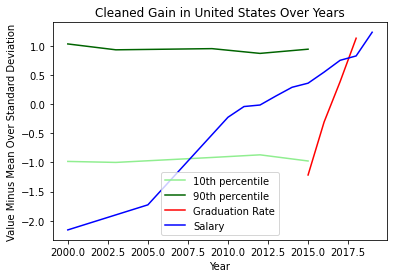

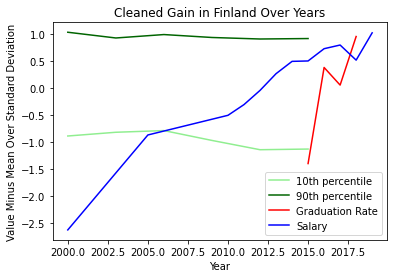

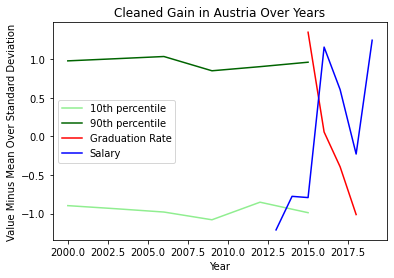

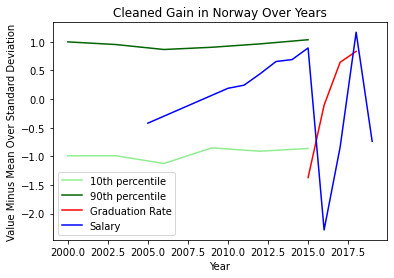

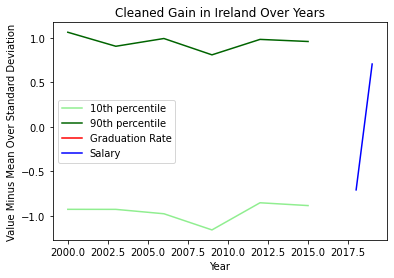

In [38]:
def plotCountry(idx):
    fig, ax = plt.subplots()
    colors = ['lightgreen', 'darkgreen', 'r', 'b']
    data = rdata[idx]
    c = 0
    for ds in data:
        dsconcat = [ds[x] for x in ds]
        mu = pd.concat(dsconcat).mean()
        std = pd.concat(dsconcat).std()
        ds-=mu
        ds/=std
        for x in ds:
            ax.plot(ds[[x]], color=colors[c], label=x)
            ax.legend()
#           c++
            c+=1
    plt.title('Cleaned Gain in ' + str(code2name[needed_countries[idx]]) + ' Over Years')
    plt.xlabel('Year')
    plt.ylabel('Value Minus Mean Over Standard Deviation')
    plt.show()
        
for i in range(len(needed_countries)):
    plotCountry(i)

In [88]:
def plotDiff(idx):
    fig, ax = plt.subplots()
    colors = ['lightgreen', 'darkgreen', 'r', 'b']
    data = [(x.diff() / x * 100).iloc[1:] for x in rdata[idx]]
    c = 0
    for ds in data:
        dsconcat = [ds[x] for x in ds]
        mu = pd.concat(dsconcat).mean()
        std = pd.concat(dsconcat).std()
#         ds-=mu
#         ds/=std
        for x in ds:
            ax.plot(ds[[x]], color=colors[c], label=x)
            ax.legend()
#           c++
            c+=1
    plt.title('Year Over Year Percent Difference in Cleaned Data in ' + str(code2name[needed_countries[idx]]) + ' Over Years')
    plt.xlabel('Year')
    plt.ylabel('Year Over Year Percent Difference')
    plt.show()

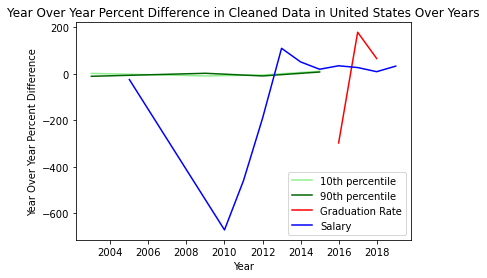

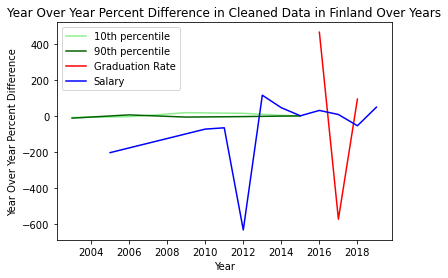

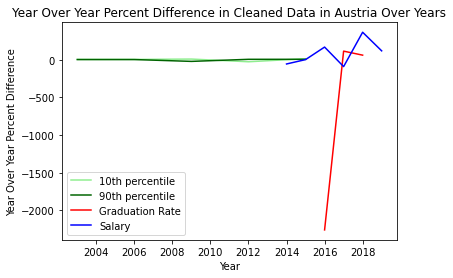

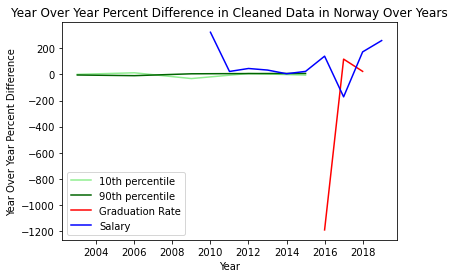

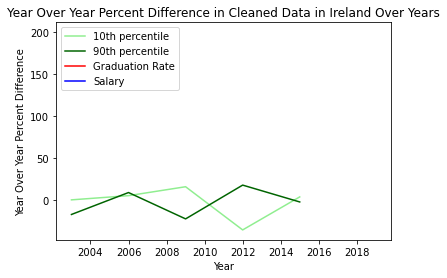

In [89]:
for i in range(len(needed_countries)):
    plotDiff(i)
